# Лабораторная работа №1.
## Персептроны. Процедура обучения Розенблатта.
### Выполнила: Михеева Кристина Олеговна
#### Группа М8О-407Б-20
##### Вариант: 15


## Цель работы

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.


## Ход работы

Для начала извлечем некоторые библиотеки, которые помогут нам в выполнении данной работы. Для построение графика нам понадобится библиотека - *matplotlib*, для выполнение операций с массивами мы подключим - *numpy*, а также библиотеку для обучния нейронных сетей - *tensorflow*

In [24]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

## Задание 1. Двумерные признаки, одномерные метки

Введем двумерный массив input, который представяет входные точки, и массив labels, который представляет распределение по классам для каждого из этих точек.

In [29]:
# Входные точки
input1 = np.array([[-4.1, -2.4], [-1.7, 1.7], [-3.7, 2.2], [-4, 1.5], [-0.1, 2.7], [2.1, 4]])

# Распределение по классам
labels1 = np.array([1, 1, 0, 0, 1, 1])

Создадим модель с одним слоем, который содержит 1 нейрон и  используем сигмоидную функцию активации.

In [30]:
model1 = keras.Sequential() # Инициализируем последовательную модель.
model1.add(keras.layers.Dense(1, activation='sigmoid'))

# Добавляем слой в модели, который содержит 1 нейрона, которые отвечают за генерацию выходных данных слоя.
# activation - функция активации, которая использует sigmoid для бинарной классификации.

Обучим модель для бинарной классификации с использованием функции потерь Binary Cross-Entropy и оптимизатора Adam.

Binary Cross-Entropy - это распространенная функция потерь для задач бинарной классификации, которая помогает модели оценивать, насколько её прогнозы соответствуют фактическим бинарным меткам (0 или 1).

Здесь используем оптимизатор Adam, который является эффективным методом оптимизации для обучения нейронных сетей, который адаптивно изменяет скорость обучения в зависимости от градиентов и истории обновлений весов.

In [31]:
model1.compile(loss='bce', optimizer='adam')

# loss - функция потерь для обучения модели.
# optimizer - оптимизатор для обновления весов модели.


В данной строке кода мы выполняем процесс обучения модели model1 на входных данных input1 с соответствующими метками labels1.

In [32]:
model1.fit(input1, labels1, batch_size=1, epochs=1000, verbose=0)
final_epoch_results = model1.evaluate(input1, labels1)
print(final_epoch_results)

# batch_size - это аргумент определяет размер мини-пакета, то есть количество обучающих примеров, которые обрабатываются моделью за одну итерацию обучения.
# epochs - кол-во эпох обучений

1/1 [==============================] - 0s 106ms/step - loss: 0.3936
0.39357900619506836


Так как однослойный перцептон является линейным слоем, то дискриминантная линия будет прямой вида: *w0+w1+b=0*

Если значение этой функции больше нуля (сигмоида от результата больше 0.5), то относим точку к первому классу, иначе ко второму.


Виуализируем результат бинарной классификации, основанных на модели.

Графически отображаются точки из набора данных, где точки разных классов могут иметь разные цвета, указанные метками labels.

Затем извлекаются параметры модели model, а именно веса и смещение первого слоя модели, который используется для построения разделяющей линии, которая.





In [ ]:

def discriminant1(input, labels, model, show_result=True):
    plt.figure(figsize=(15,7)) # Создаем график с указанным размером.

    plt.scatter(input[:, 0], input[:, 1], c = labels) # Отобразим точки на графике, параметр color определяет цвет каждой точки на основве соот-щих меток.

    w, b = model.layers[0].get_weights() # Извлекаем вес и смещение первого слоя.

    disc = np.linspace(-5, 5, 5) # Массив для посторение дискриминантной линии.
    plt.plot(disc, (-w[0] * disc - b) / w[1]) # Строим дискриминантную линию, по заданной формуле.

    plt.grid()
    if show_result:
        plt.show()

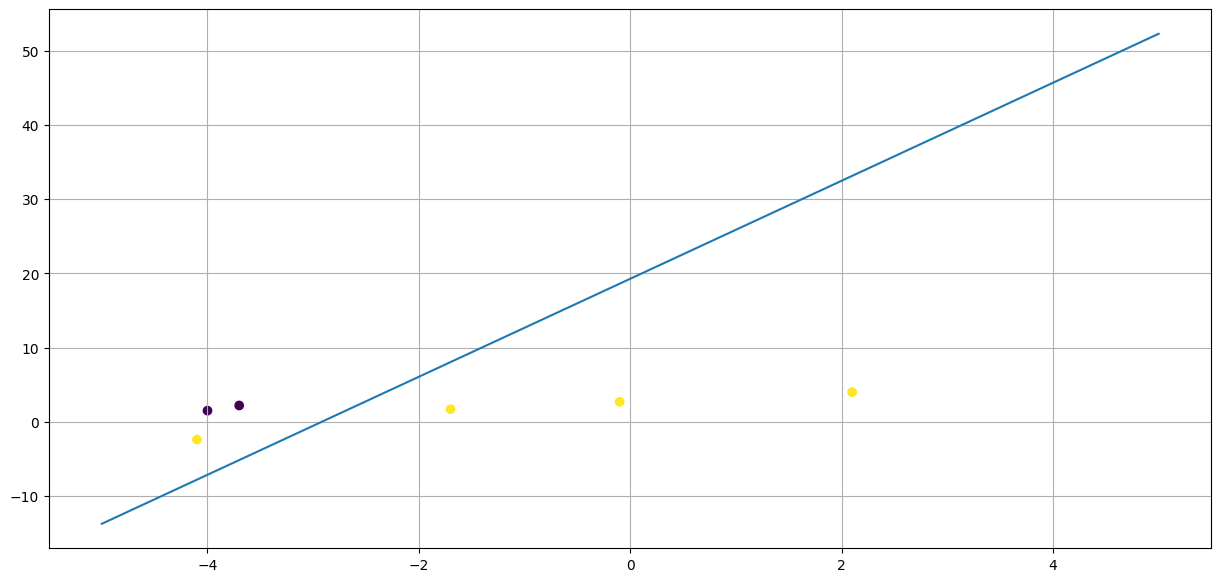

In [ ]:

discriminant1(input1, labels1, model1)

Проверим на тестовых данных.

In [ ]:

def check1(input, labels, model, n=5, threshold=0.5):
    discriminant1(input, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100)
    plt.show()

1/1 [==============================] - 0s 158ms/step


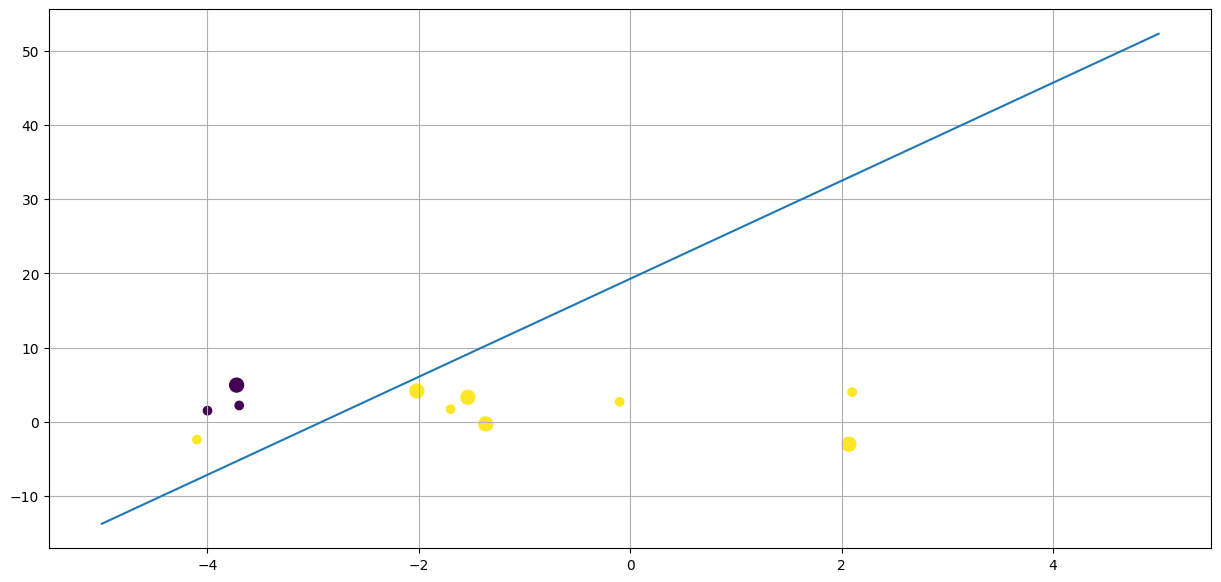

In [ ]:
check1(input1, labels1, model1)


Видим, что перцептрон определил классы c хорошей точностью.

## Задание 2. Двумерные признаки, двумерные метки

Введем двумерный массив input2, который представяет входные точки, а также двумерный массив labels2, который представляет распределение по классам для каждого из этих точек.

In [ ]:
input2 = np.array([[4.1, -2.2], [2.5, 2.5], [-1.2, 0.6], [-4.3, -4.5], [0.3, 2.7], [4.3, -3.8], [0.6, -0.4], [-4.9, -1.7]])

# Распределение по классам
labels2 = np.array([[1, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 1], [0, 1], [0, 0]])

Тоже самое проделываем, что и в предыдущем задание.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(2, activation='sigmoid'))

In [ ]:
model2.compile(loss='bce', optimizer='adam')

In [23]:
model2.fit(input2, labels2, batch_size=1, epochs=1000, verbose=0)
final_epoch_results = model1.evaluate(input2, labels2)
print(final_epoch_results)

# batch_size - это аргумент определяет размер мини-пакета, то есть количество обучающих примеров, которые обрабатываются моделью за одну итерацию обучения.
# epochs - кол-во эпох обучений

1/1 [==============================] - 0s 210ms/step - loss: 1.5567
1.5567291975021362


Сейчас мы классифицируем уже на 4 класса, поэтому разделяющих прямых будет две.

In [ ]:
def discriminant2(input, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(input[:, 0], input[:, 1], c =[int(str(i*10 + j), 2) for i, j in labels])

    w, b = model.layers[0].get_weights()

    discriminant = np.linspace(-5, 5, 5)
    plt.plot(discriminant, (-w[0][0] * discriminant - b[0]) / w[1][0]) # Первая дискриминантная линия.
    plt.plot(discriminant, (-w[0][1] * discriminant - b[1]) / w[1][1]) # Вторая дискриминантная линия.

    plt.grid()
    if show_result:
        plt.show()

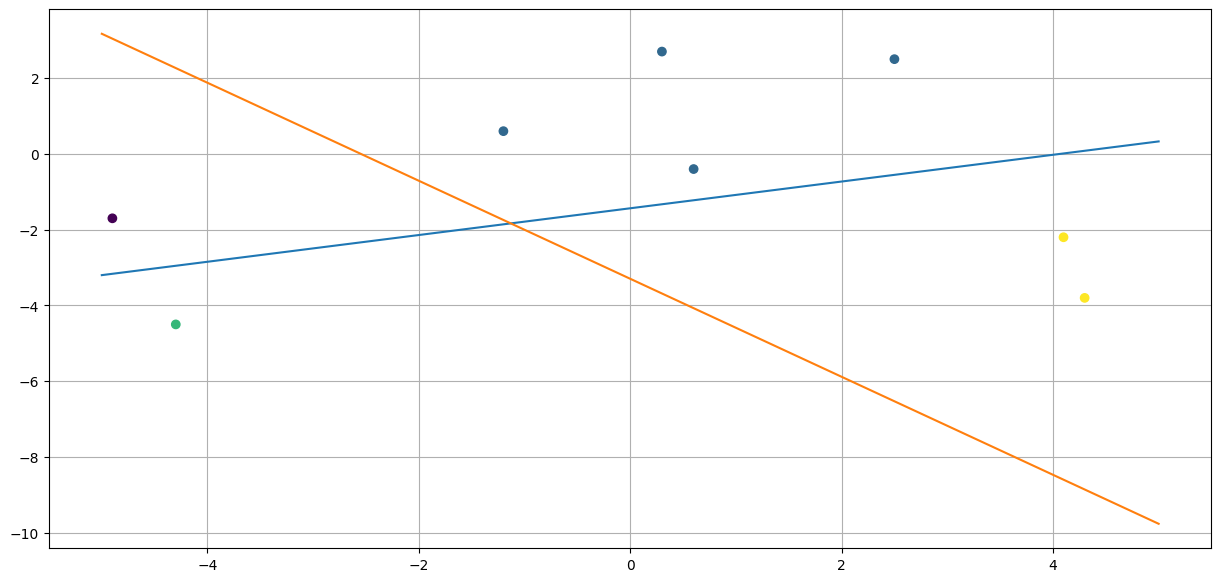

In [ ]:
discriminant2(input2, labels2, model2)


Также сделаем тест.

In [ ]:
def check2(data, labels, model, n=5, threshold=0.5):
    discriminant2(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold

    plt.scatter(test_data[:, 0], test_data[:, 1],
                c=[int(str(i*10 + j), 2) for i, j in test_labels], s=100)
    plt.show()

1/1 [==============================] - 0s 66ms/step


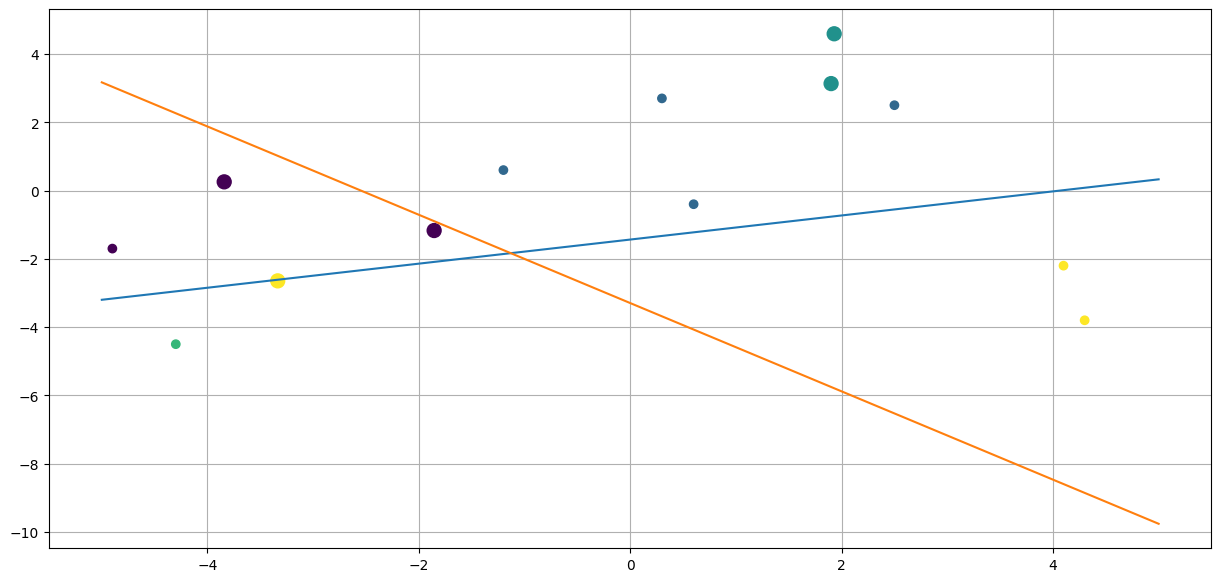

In [ ]:
check2(input2, labels2, model2)

Также как и в перврй задаче перцептрон неплохо справился с классификацией тестовых точек.

## Вывод
В данной лабораторной работе была поставлена задача исследовать свойства персептрона Розенблата и применить его для решения задачи распознования образов.

Мной был изучен алгоритм обучения персептрона Розенблатта, который включает в себя коррекцию весовых коэффициентов нейронов на основе ошибки предсказания.

Результатом выполнения данной работы является  обученный персептрон, способный классифицировать образы на основе изученных свойств и обучающих данных.


